In [ ]:
import pandas as pd
df = pd.read_excel('Final_dataset.xlsx')

In [ ]:
df.head()

,review,label - Annotator 1,label - Annotator 2,gold label
0,Boring and ha ha land,1,1,1
1,All Filler and No movement,1,1,1
2,"It's OK, but I just didn't like it as much as ...",0,1,0
3,A whole lot of nothing,1,1,1
4,"Best spidey movie ever, AND ITS ONLY PART ONE!",0,0,0


**Annotator 1 Distribution**

In [ ]:
df['label - Annotator 1'].value_counts()

,count
label - Annotator 1,
1,125
0,125


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

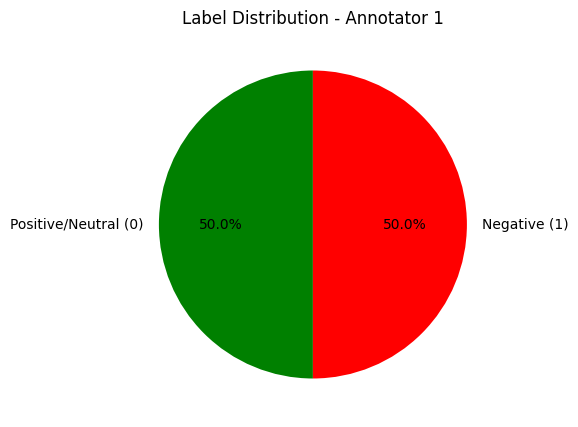

In [ ]:
# Pie chart for Annotator 1
annotator_1_counts = df['label - Annotator 1'].value_counts()
annotator_1_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Positive/Neutral (0)', 'Negative (1)'],
    colors=['green', 'red'],
    startangle=90,
    figsize=(5, 5),
    legend=False
)
plt.title('Label Distribution - Annotator 1')
plt.ylabel('')
plt.show()


**Annotator 2 distribution**

In [ ]:
df['label - Annotator 2'].value_counts()

,count
label - Annotator 2,
0,126
1,124


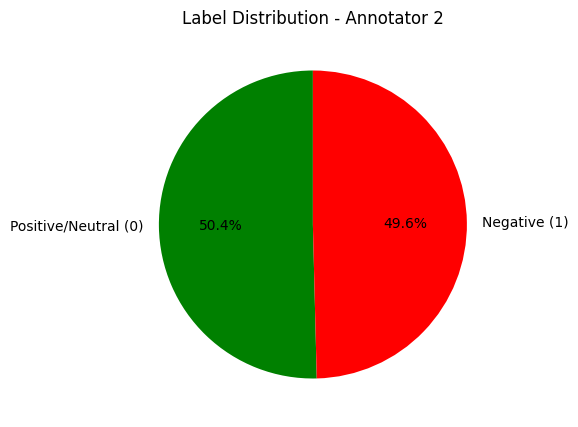

In [ ]:
# Pie chart for Annotator 2
annotator_2_counts = df['label - Annotator 2'].value_counts()
annotator_2_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Positive/Neutral (0)', 'Negative (1)'],
    colors=['green', 'red'],
    startangle=90,
    figsize=(5, 5),
    legend=False
)
plt.title('Label Distribution - Annotator 2')
plt.ylabel('')
plt.show()


**Gold Label Distribution**

In [ ]:
df['gold label'].value_counts()

,count
gold label,
0,128
1,122


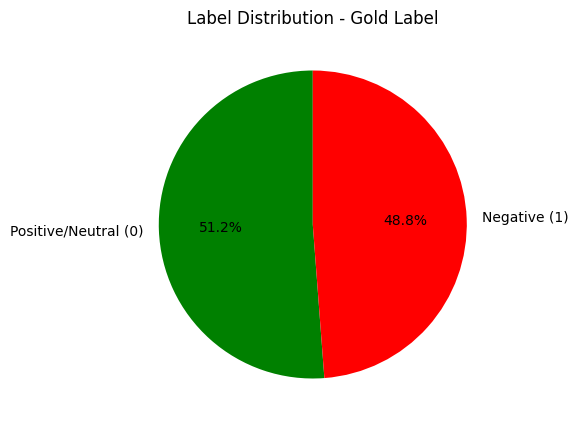

In [ ]:
# Pie chart for Gold Label
gold_label_counts = df['gold label'].value_counts()
gold_label_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['Positive/Neutral (0)', 'Negative (1)'],
    colors=['green', 'red'],
    startangle=90,
    figsize=(5, 5),
    legend=False
)
plt.title('Label Distribution - Gold Label')
plt.ylabel('')
plt.show()


**Agreement vs Disagreement between Annotator 1 and 2**

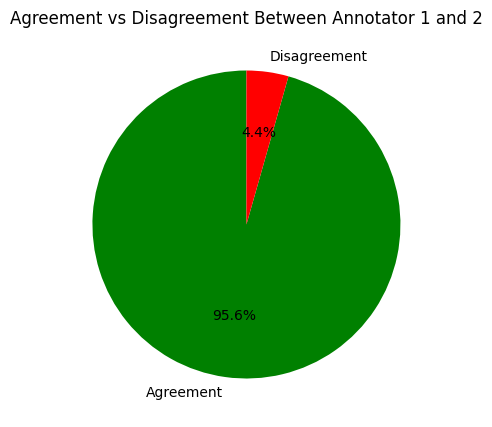

In [31]:
# Calculate agreement and disagreement
df['agreement'] = df['label - Annotator 1'] == df['label - Annotator 2']
agreement_counts = df['agreement'].value_counts()

# Map True to "Agreement" and False to "Disagreement"
agreement_labels = agreement_counts.index.map({True: 'Agreement', False: 'Disagreement'})

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    agreement_counts,
    labels=agreement_labels,
    autopct='%1.1f%%',
    colors=['green', 'red'],
    startangle=90
)
plt.title('Agreement vs Disagreement Between Annotator 1 and 2')
plt.show()


**Pre Processing**

In [ ]:
import re

In [ ]:
df['review'] = df['review'].fillna("")

df['review'] = df['review'].str.lower()

df['review'] = df['review'].str.strip()

df['review'] = df['review'].str.replace(r'[^\w\s]', '', regex=True)

df['review'] = df['review'].str.replace(r'\s+', ' ', regex=True)

df.to_excel('cleaned_dataset.xlsx', index=False)

print("cleaned dataset is saved to 'cleaned_dataset.xlsx'")


cleaned dataset is saved to 'cleaned_dataset.xlsx'


In [ ]:
data = pd.read_excel('cleaned_dataset.xlsx')
data.head()

,review,label - Annotator 1,label - Annotator 2,gold label
0,boring and ha ha land,1,1,1
1,all filler and no movement,1,1,1
2,its ok but i just didnt like it as much as the...,0,1,0
3,a whole lot of nothing,1,1,1
4,best spidey movie ever and its only part one,0,0,0


**Cohen's Kappa **

In [32]:
from sklearn.metrics import cohen_kappa_score
y1 = df['label - Annotator 1']
y2 = df['label - Annotator 2']
cohen_kappa_score(y1, y2)

0.912

**Evaluation**

In [ ]:
from transformers import pipeline

df = pd.read_excel('cleaned_dataset.xlsx')

# Setting up the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Defining candidate labels
candidate_labels = ["positive", "negative"]

# Applying zero-shot classification to each review
df['predicted_label'] = df['review'].apply(lambda x: classifier(x, candidate_labels)['labels'][0])

# Mapping labels to 0 and 1
df['predicted_label'] = df['predicted_label'].map({'positive': 0, 'negative': 1})

# Evaluate accuracy and F1 score
from sklearn.metrics import accuracy_score, f1_score
val_acc = accuracy_score(df['gold label'], df['predicted_label'])
val_f1 = f1_score(df['gold label'], df['predicted_label'], average='macro')

print(f'Validation Accuracy: {val_acc}')
print(f'Validation F1 Score: {val_f1}')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Validation Accuracy: 0.944
Validation F1 Score: 0.9439964157706093
